- LinearRegression
- from xgboost import XGBRegressor

In [1]:
import random
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [4]:
cf = pd.DataFrame(house.data,columns = house.feature_names)
cf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
cf['Target']= house.target
cf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

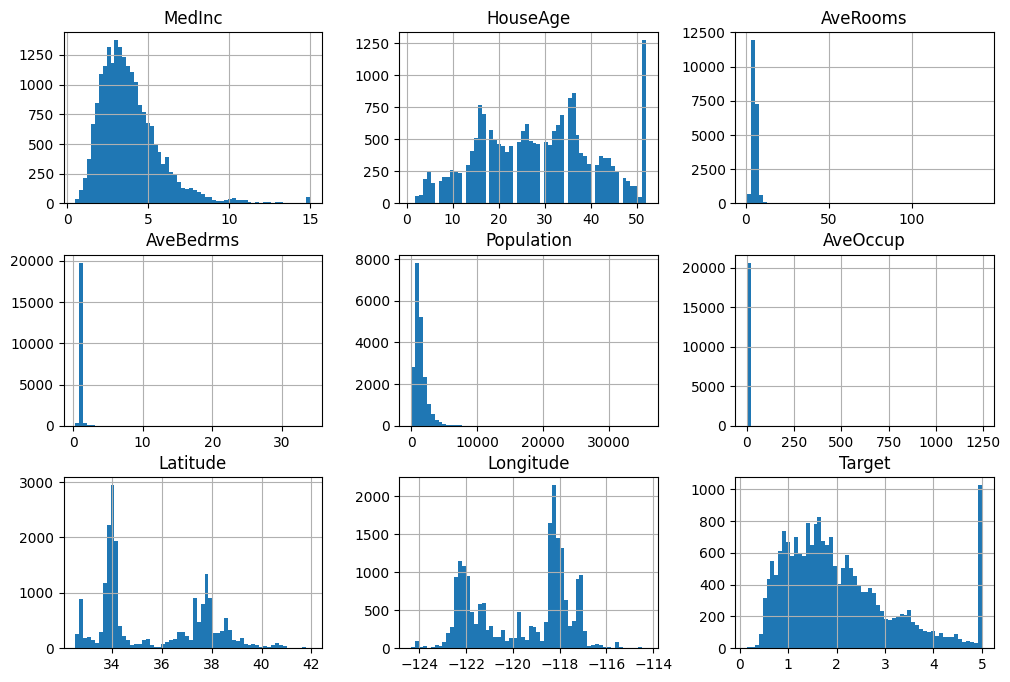

In [7]:
cf.hist(bins=60, figsize=(12,8))

In [69]:
cf_df =cf.copy()

In [70]:
cf_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

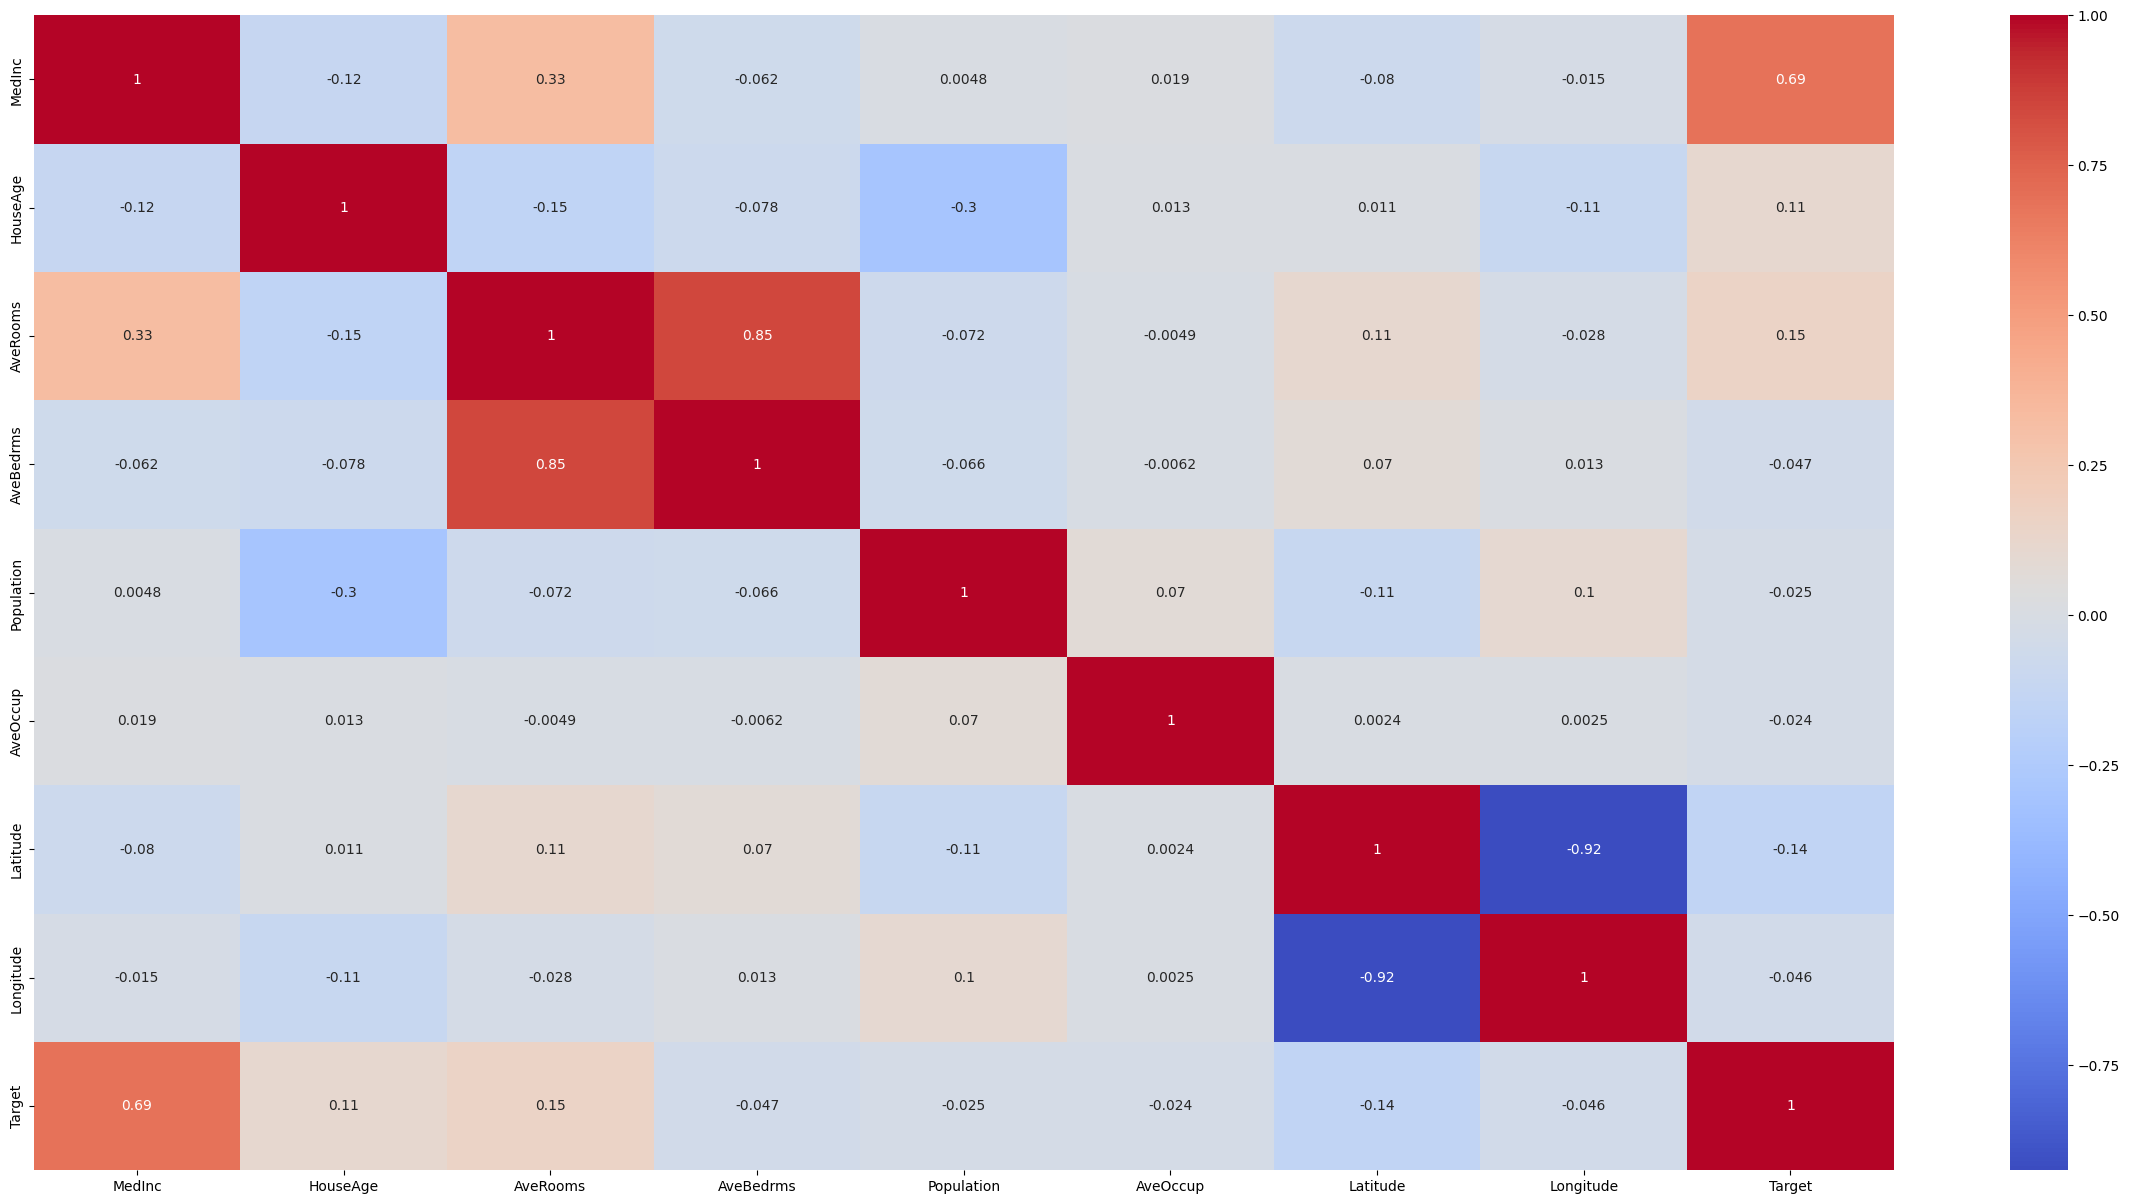

In [13]:
plt.figure(figsize=(30, 15))
sns.heatmap(cf_df.corr(), annot=True, cmap='coolwarm')

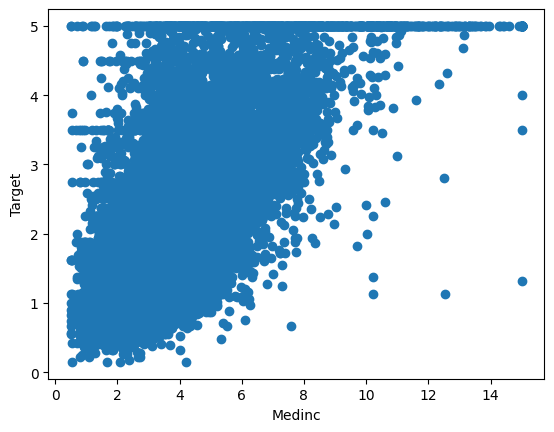

In [16]:
x= cf_df['MedInc']
y = cf_df['Target']

plt.scatter(x,y)
plt.xlabel('Medinc')
plt.ylabel('Target')
plt.show()

In [19]:
a = cf_df.corr()
correlation_ranking = a['Target'].sort_values(ascending=False)

# 순위 출력
print(correlation_ranking)

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


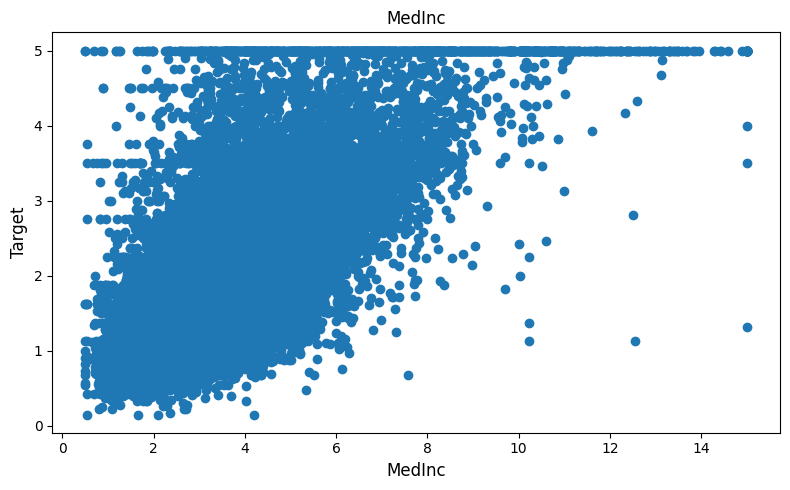

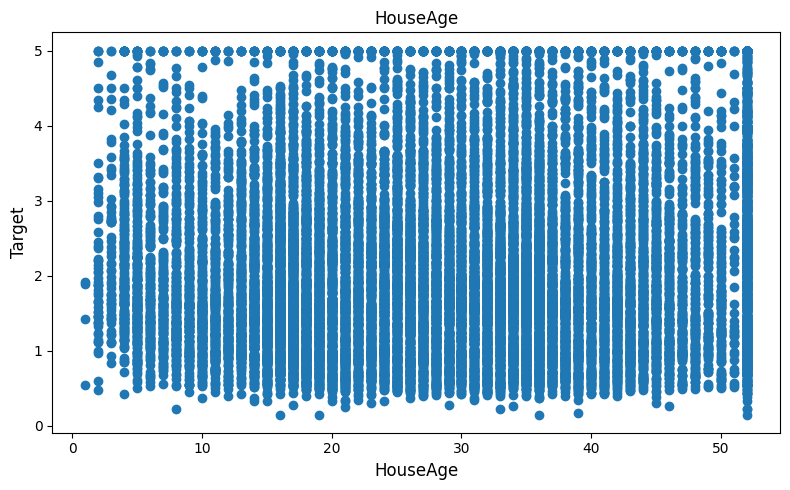

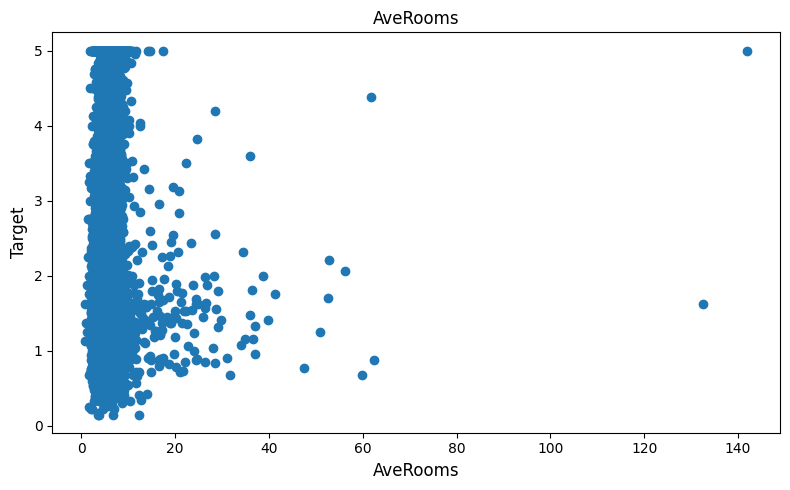

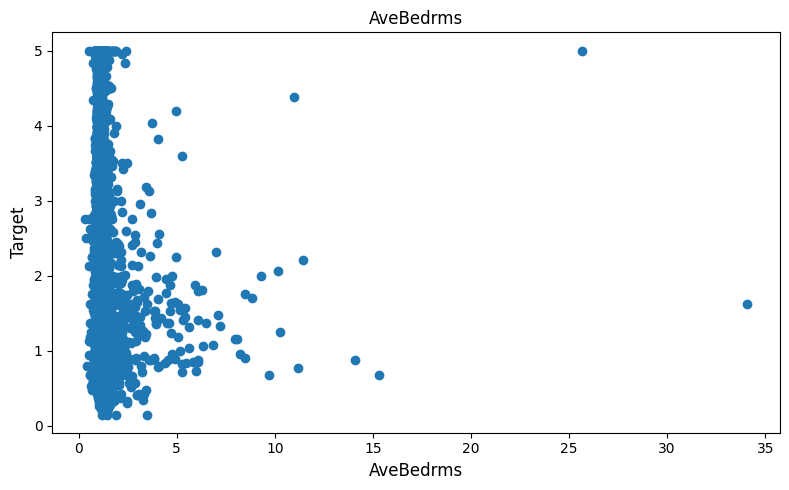

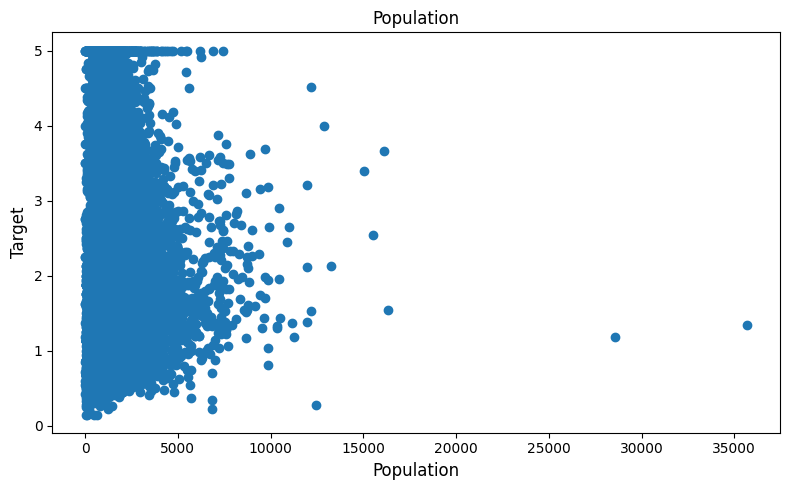

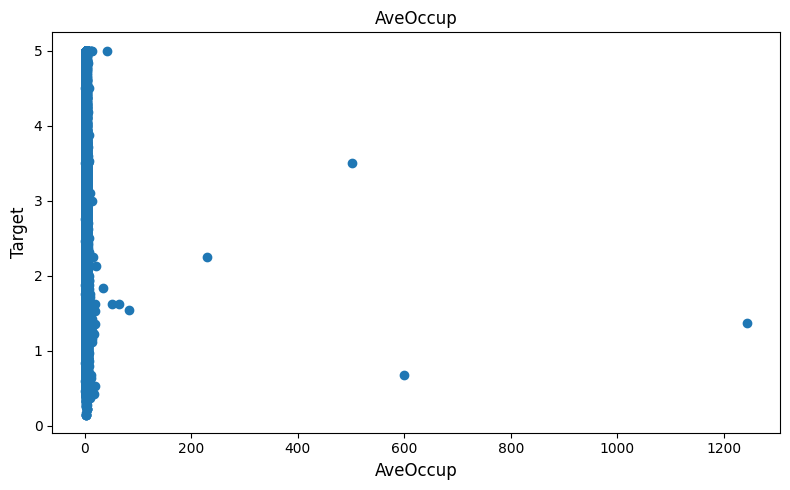

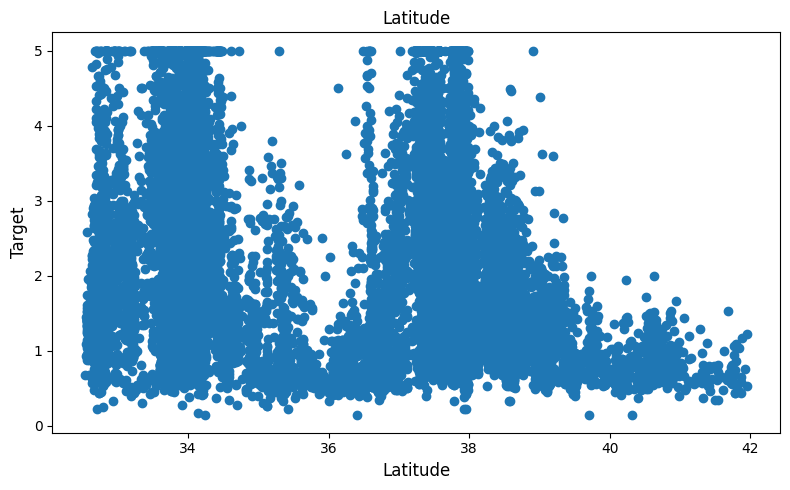

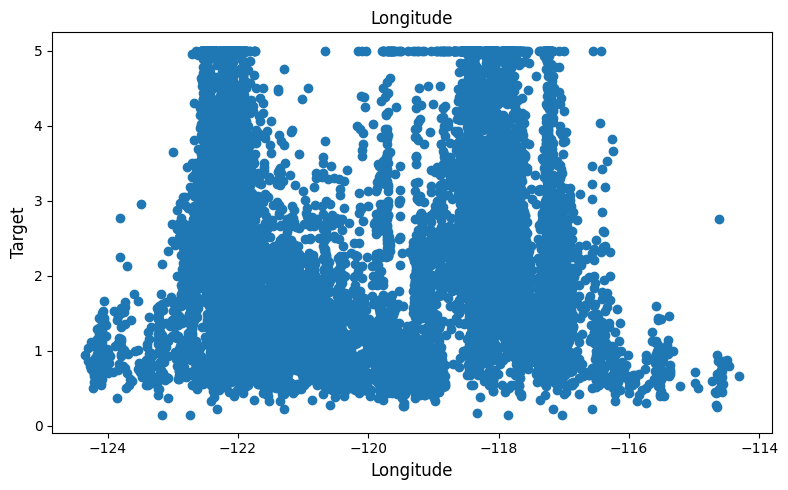

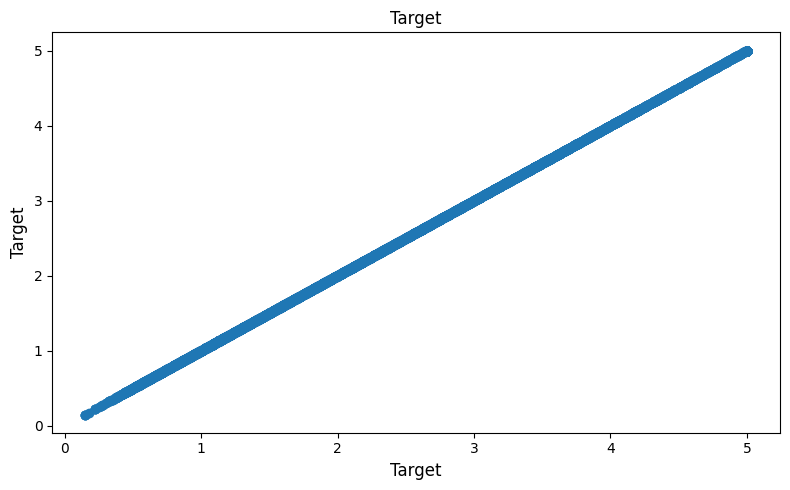

In [20]:
for i,col in enumerate(cf_df.columns):
  plt.figure(figsize=(8,5))
  plt.scatter(cf_df[col],cf_df['Target'])
  plt.ylabel('Target',size=12)
  plt.xlabel(col,size=12)
  plt.title(col)
  plt.tight_layout()

<Axes: xlabel='Longitude', ylabel='Latitude'>

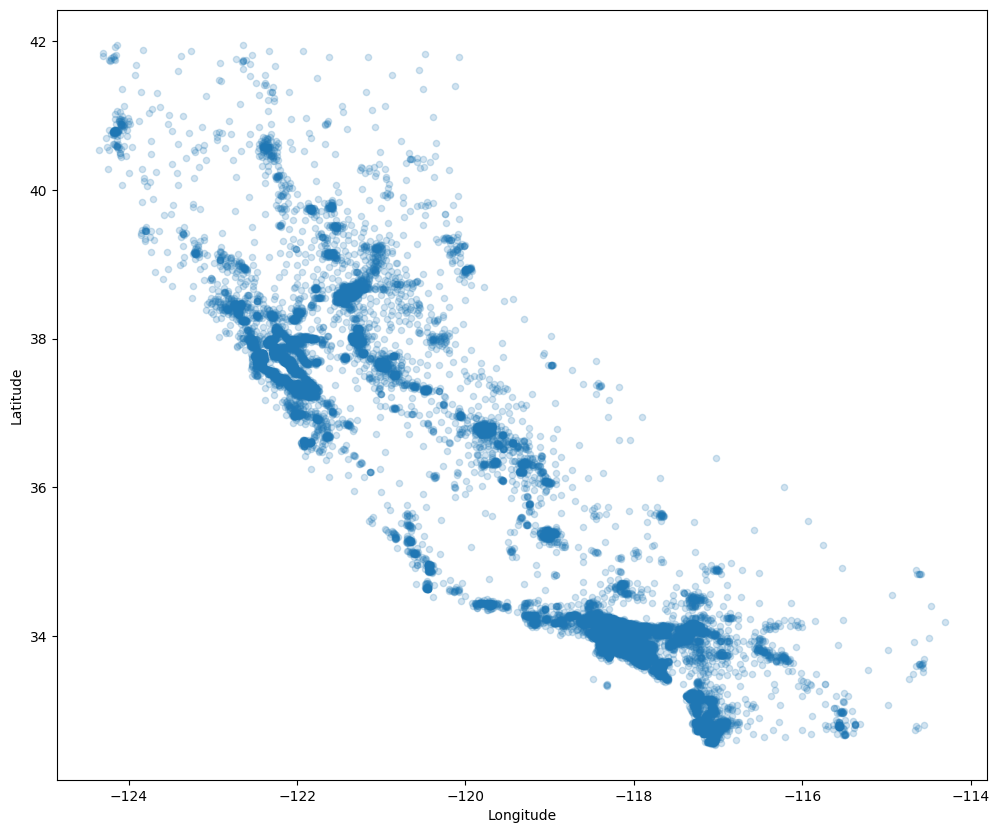

In [22]:
cf_df.plot(kind='scatter', x='Longitude',y='Latitude', alpha=0.2,figsize=(12,10))

<Axes: xlabel='Longitude', ylabel='Latitude'>

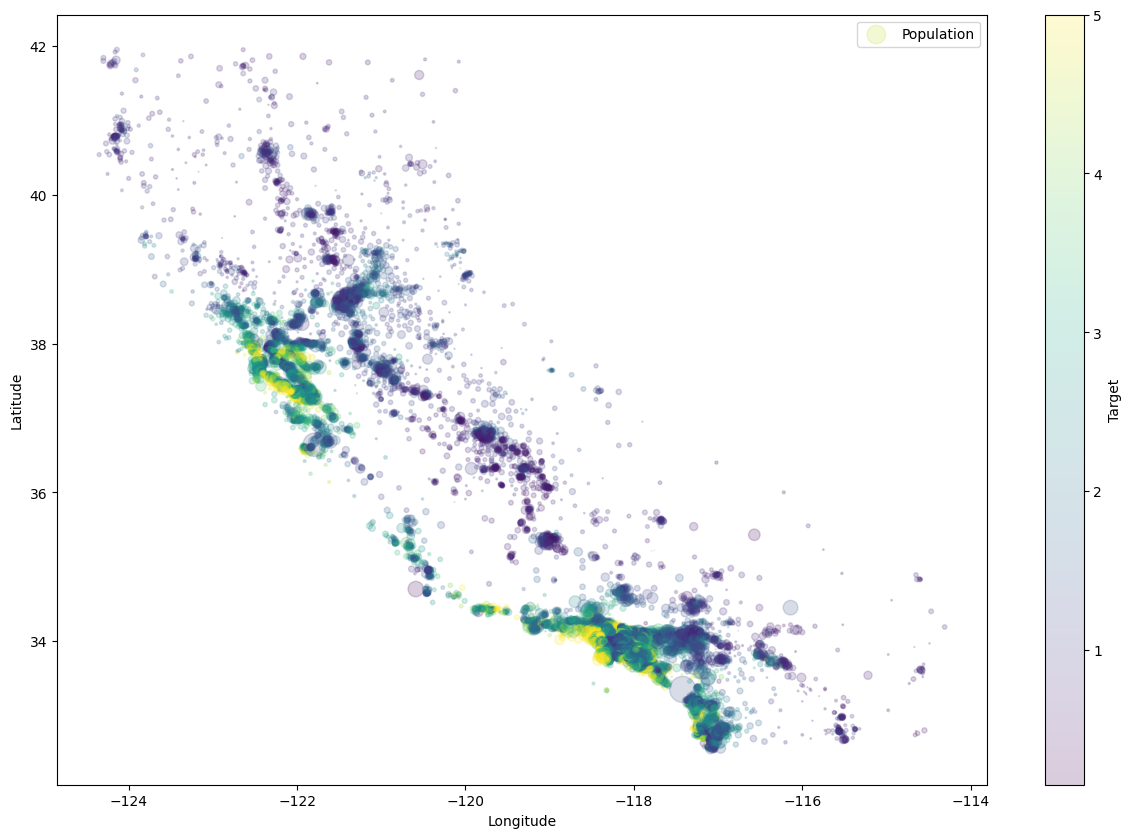

In [25]:
cf_df.plot(kind='scatter', x='Longitude',y='Latitude', alpha=0.2,
        s=cf_df['Population']/100, label='Population', figsize=(15,10),
        c='Target', cmap=plt.get_cmap('viridis'), colorbar=True)

In [29]:
x = cf_df.drop('Target',axis=1)

In [35]:
x = cf_df.iloc[:,:-1]

In [36]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
cf_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [32]:
y = cf_df.iloc[:,-1]

In [33]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [84]:
# x=cf_df['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
#        'Latitude', 'Longitude']
# y=cf_df['Target']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test, y_train, y_test = train_test_split(house.data,house.target,test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()

In [98]:
model.fit(X_train,y_train)

LinearRegression()

In [99]:
pred = model.predict(X_test)

In [100]:
from sklearn.model_selection import cross_val_score

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

scores = cross_val_score(model,house.data,house.target, cv = 10, scoring = 'neg_mean_squared_error')
print(scores.mean())

r2_scores = cross_val_score(model,house.data,house.target, cv = 10, scoring = 'r2')
print(r2_scores.mean())

0.6125511913966952
0.5757877060324524
-0.550952429695663
0.5110068610523775


In [101]:
print(' y = ' + str(model.intercept_)+' ')
for i,c in enumerate(model.coef_):
  print(str(c)+ '*x '+str(i))

 y = -37.02327770606391 
0.4486749096657172*x 0
0.00972425751790503*x 1
-0.12332334282795941*x 2
0.7831449067929727*x 3
-2.029620580093136e-06*x 4
-0.0035263184871341473*x 5
-0.4197924865883597*x 6
-0.43370806496398734*x 7


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_reg_eval(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, y_pred)

    print('Mean Absolute Error (MAE): {:.4f}'.format(MAE))
    print('Mean Squared Error (MSE): {:.4f}'.format(MSE))
    print('Root Mean Squared Error (RMSE): {:.4f}'.format(RMSE))
    print('R-squared (R2): {:.4f}'.format(R2))
get_reg_eval(y_test, pred)

Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R-squared (R2): 0.5758


In [107]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [108]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [116]:
from sklearn.model_selection import cross_val_score

print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

scores = cross_val_score(xgb,house.data,house.target, cv = 10, scoring = 'neg_mean_squared_error')
print(scores.mean())

r2_scores = cross_val_score(xgb,house.data,house.target, cv = 10, scoring = 'r2')
print(r2_scores.mean())

0.9445725845802867
0.8301370561019205
-0.4002373621699272
0.626673925917959


In [109]:
pred=xgb.predict(X_test)

get_reg_eval(y_test,pred)

Mean Absolute Error (MAE): 0.3096
Mean Squared Error (MSE): 0.2226
Root Mean Squared Error (RMSE): 0.4718
R-squared (R2): 0.8301


In [113]:
y_train_predict = xgb.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = r2_score(y_train,y_train_predict)


print('RMSE: {}'.format(rmse))
print('R2 Score {}'.format(r2))

RMSE: 0.27220242700768493
R2 Score 0.9445725845802867


In [112]:
y_test_predict = xgb.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2 = r2_score(y_test,y_test_predict)


print('RMSE: {}'.format(rmse))
print('R2 Score {}'.format(r2))

RMSE: 0.4717943691423984
R2 Score 0.8301370561019205


In [120]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGBoost 회귀 모델 초기화
xgb = XGBRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'learning_rate': [0.01, 0.1, 0.3],  # 학습률
    'max_depth': [3, 5, 7],  # 트리 최대 깊이
    'colsample_bytree': [0.5, 0.7, 0.9]  # 트리의 각 노드에서 특성(feature)을 무작위로 선택하는 비율
}

# 그리드 서치 객체 초기화
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_test_predict = best_model.predict(X_test)

# RMSE 및 R2 Score 계산
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
RMSE: 0.4393149877629829
R2 Score: 0.8527195236923125


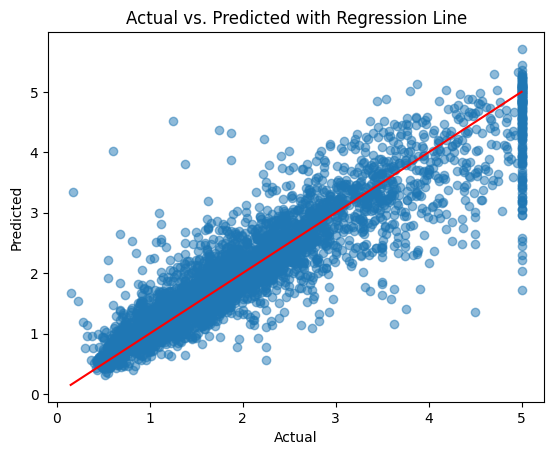

In [115]:
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red')  # 회귀선 추가
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted with Regression Line')
plt.show()